# Intermediate Importing Data in Python

In [8]:
# Importing the course packages
import json
import pandas as pd

# Read the Twitter data
tweets_data = []
tweets_file = open("datasets/tweets.txt", "r")
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()

# Import the other two datasets
wine = pd.read_csv("datasets/winequality-red.csv", sep=";")
latitude = pd.read_excel("datasets/latitude.xls")

## Content 

- Importing text files and flat files
- Importing files in other formats
- Writing SQL queries
- Getting data from relational databases
- Pulling data from the web
- Pulling data from APIs

# PART ONE

## 1 Importing flat files from the web

## You’re already great at importing!

- Flat files such as .txt and .csv 
- Pickled files, Excel spreadsheets, and many others!
- Data from relational databases
- You can do all these locally
- What if your data is online?
![Screen Shot 2023-08-29 at 11.49.17 AM](Screen%20Shot%202023-08-29%20at%2011.49.17%20AM.png)

## Can you import web data?
- You can: go to URL and click to download files
- BUT: not reproducible, not scalable


## You’ll learn how to ...

- Import and locally save datasets from the web
- Load datasets into pandas DataFrames
- Make HTTP requests (GET requests)
- Scrape web data such as HTML
- Parse HTML into useful data (BeautifulSoup)
- Use the urllib and request spackages

## The `urllib` package
- Provides interface for fetching data across the web
- `urlopen()`- accepts URLs instead of file name

## How to automate file download in Python

In [2]:
from urllib.request import urlretrieve
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urlretrieve(url, 'winequality-white.csv')

('winequality-white.csv', <http.client.HTTPMessage at 0x7fe3c74883d0>)

## Importing flat files from the web: your turn!
You are about to import your first file from the web! The flat file you will import will be `'winequality-red.csv'` from the University of California, Irvine's Machine Learning repository. The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is

`'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'`  
After you import it, you'll check your working directory to confirm that it is there and then you'll load it into a pandas DataFrame.

### Instructions

- Import the function urlretrieve from the subpackage urllib.request.
- Assign the URL of the file to the variable url.
- Use the function urlretrieve() to save the file locally as 'winequality-red.csv'.
- Execute the remaining code to load 'winequality-red.csv' in a pandas DataFrame and to print its head to the shell.

In [6]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


## Opening and reading flat files from the web

You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using pandas. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator sep as the second argument.

The URL of the file, once again, is  
`'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'`  

### Instructions

- Assign the URL of the file to the variable `url`.
- Read file into a DataFrame df using `pd.read_csv()`, recalling that the separator in the file is ';'.
- Print the head of the DataFrame `df`.
- Execute the rest of the code to plot histogram of the first feature in the DataFrame `df`.

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


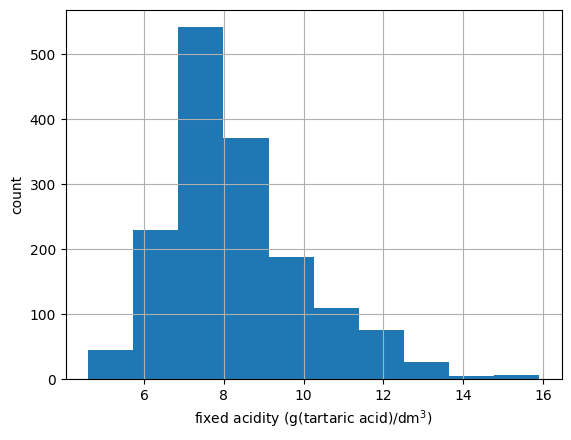

In [7]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

## Importing non-flat files from the web
Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function `pd.read_csv()`. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use `pd.read_excel()` to import an Excel spreadsheet.

The URL of the spreadsheet is

'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'  
Your job is to use pd.read_excel() to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

### Instructions

- Assign the URL of the file to the variable `url`.
- Read the file in url into a dictionary xls using `pd.read_excel()` recalling that, in order to import all sheets you need to pass None to the argument sheet_name.
- Print the names of the sheets in the Excel spreadsheet; these will be the keys of the dictionary xls.
- Print the head of the first sheet using the sheet name, not the index of the sheet! The sheet name is '1700'

In [8]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## 2 HTTP requests to import files from the web

## URL

- Uniform/Universal Resource Locator
- References to web resources
- Focus: web addresses
- Ingredients:
    - Protocol identifier-http:
    - Resource name- datacamp.com 
- These specify web addresses uniquely

## HTTP

- HyperText Transfer Protocol
- Foundation of data communication for the web
- HTTPS- more secure form of HTTP
- Going to a website = sending HTTP request
    - GET request
- `urlretrieve()` performs a GET request
- HTML-HyperText Markup Language


## GET requests using `urllib`

In [3]:
from urllib.request import urlopen, Request
url = "https://www.wikipedia.org/"
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()

## GET requests using requests

- One of the most downloaded Python packages

In [4]:
import requests
url = "https://www.wikipedia.org/"
r = requests.get(url)
text = r.text

## Performing HTTP requests in Python using urllib

Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from the first coding exercise of this course, `"https://campus.datacamp.com/courses/1606/4135?ex=2"`.  

In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

### Instructions

- Import the functions `urlopen` and Request from the subpackage `urllib.request`.
- Package the request to the url `"https://campus.datacamp.com/courses/1606/4135?ex=2"` using the function Request() and assign it to request.
- Send the request and catch the response in the variable response with the function `urlopen()`.
- Run the rest of the code to see the datatype of response and to close the connection!

In [ ]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

## Printing HTTP request results in Python using `urllib`

You have just packaged and sent a GET request to "https://campus.datacamp.com/courses/1606/4135?ex=2" and then caught the response. You saw that such a response is a http.client.HTTPResponse object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a http.client.HTTPResponse object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

### Instructions

- Send the request and catch the response in the variable response with the function `urlopen()`, as in the previous exercise.
- Extract the response using the `read()` method and store the result in the variable html.
- Print the string `html`.
- Hit submit to perform all of the above and to close the response: be tidy!

In [9]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

## Performing HTTP requests in Python using requests

Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their "http://www.datacamp.com/teach/documentation" page.

Note that unlike in the previous exercises using `urllib`, you don't have to close the connection when using requests!

### Instructions

- Import the package `requests`.
- Assign the URL of interest to the variable `url`.
- Package the `request` to the URL, send the `request` and catch the `response` with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the text attribute of the object `r` to return the HTML of the webpage as a string; store the result in a variable text.
- Hit submit to print the HTML of the webpage.

In [10]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"


# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

## 3 Scraping the web in Python

## HTML

- Mix of unstructured and structured data
- Structured data:
    - Has pre-defined data model,or
    - Organized in a defined manner
- Unstructured data: neither of these properties

![Screen Shot 2023-08-29 at 12.04.35 PM](Screen%20Shot%202023-08-29%20at%2012.04.35%20PM.png)


## BeautifulSoup

- Parse and extract structured data from HTML
![Screen Shot 2023-08-29 at 12.05.48 PM](Screen%20Shot%202023-08-29%20at%2012.05.48%20PM.png)
- Make tag soup beautiful and extract information

## BeautifulSoup

In [1]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.crummy.com/software/BeautifulSoup/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
## Prettified Soup
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

## Exploring BeautifulSoup

- Many methods such as:
- `find_all()`

In [5]:
print(soup.title)
print(soup.get_text())
for link in soup.find_all('a'):    
    print(link.get('href'))

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>



Beautiful Soup: We called him Tortoise because he taught us.









[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about enco

## Parsing HTML with `BeautifulSoup`

In this interactive exercise, you'll learn how to use the `BeautifulSoup` package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is url = `'https://www.python.org/~guido/'`.

### Instructions

- Import the function `BeautifulSoup` from the package `bs4`.
- Assign the URL of interest to the variable `url`.
- Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the text attribute of the object `r` to return the HTML of the webpage as a string; store the result in a variable `html_doc`.
- Create a `BeautifulSoup` object soup from the resulting HTML using the function `BeautifulSoup()`.
- Use the method `prettify()` on soup and assign the result to `pretty_soup`.
- Hit submit to print to prettified HTML to your shell!

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

## Turning a webpage into data using BeautifulSoup: getting the text
As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

### Instructions

- In the sample code, the HTML response object html_doc has already been created: your first task is to Soupify it using the function `BeautifulSoup()` and to assign the resulting soup to the variable `soup`.
- Extract the title from the HTML soup soup using the attribute title and assign the result to `guido_title`.
- Print the title of Guido's webpage to the shell using the `print()` function.
- Extract the text from the HTML soup soup using the method `get_text()` and assign to `guido_text`.
- Hit submit to print the text from Guido's webpage to the shell.

In [11]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "l

## Turning a webpage into data using `BeautifulSoup`: getting the hyperlinks

In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

### Instructions

- Use the method `find_all()` to find all hyperlinks in soup, remembering that hyperlinks are defined by the HTML tag `<a>` but passed to `find_all()` without angle brackets; store the result in the variable `a_tags`.
- The variable `a_tags` is a results set: your job now is to enumerate over it, using a `for` loop and to print the actual URLs of the hyperlinks; to do this, for every element link in `a_tags`, you want to `print()` `link.get('href')`.

In [12]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


# PART TWO

## 1 Introduction to APIs and JSONs

## APIs
- Application Programming Interface 
- Protocols and routines 
    - Building and interacting with software applications

![Screen Shot 2023-08-29 at 1.21.32 PM](Screen%20Shot%202023-08-29%20at%201.21.32%20PM.png)

![Screen Shot 2023-08-29 at 1.21.41 PM](Screen%20Shot%202023-08-29%20at%201.21.41%20PM.png)


## JSONs
- JavaScript Object Notation
- Real-time server-to-browser communication
- Douglas Crockford
- Human readable

![Screen Shot 2023-08-29 at 1.21.57 PM](Screen%20Shot%202023-08-29%20at%201.21.57%20PM.png)


## Loading JSONs in Python

In [ ]:
import json
with open('snakes.json', 'r') as json_file:        
    json_data = json.load(json_file)
    
type(json_data)

## Exploring JSONs in Python

In [ ]:
for key, value in json_data.items():    
    print(key + ':', value)

## Loading and exploring a JSON
Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. Here, you'll load the JSON 'a_movie.json' into the variable json_data, which will be a dictionary. You'll then explore the JSON contents by printing the key-value pairs of json_data to the shell.

### Instructions

- Load the JSON `'a_movie.json'` into the variable json_data within the context provided by the with statement. To do so, use the function `json.load()` within the context manager.
- Use a for loop to print all key-value pairs in the dictionary json_data. Recall that you can access a value in a dictionary using the syntax: `dictionary[key]`.

In [ ]:
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

## 2. APIs and interacting with the world wide web

## Herein, you’ll learn
- What APIs are
- Why APIs are important
- In the exercises:
    - Connecting to APIs
    - Pulling data from APIs
    - Parsing data from APIs

## What is an API?

- Set of protocols and routines
- Bunch of code
    - Allows two software programs to communicate with each other

![Screen Shot 2023-08-29 at 1.30.17 PM](Screen%20Shot%202023-08-29%20at%201.30.17%20PM.png)

## APIs are everywhere

![Screen Shot 2023-08-29 at 1.31.01 PM](Screen%20Shot%202023-08-29%20at%201.31.01%20PM.png)


## Connecting to an API in Python

In [ ]:
import requests
url = 'http://www.omdbapi.com/?t=hackers'
r = requests.get(url)
json_data = r.json()
for key, value in json_data.items():    
    print(key + ':', value)


## What was that URL?
- hp-making an HTTP request 
- www.omdbapi.com - queryingtheOMDBAPI
- `?t=hackers`
    - Query string
    - Return data for a movie with title(t) ‘Hackers’`'http://www.omdbapi.com/?t=hackers'`

## API requests
Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that, in the video, to query the API about the movie Hackers, Hugo's query string was 'http://www.omdbapi.com/?t=hackers' and had a single argument t=hackers.

Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: apikey=72bc447a.

### Instructions

- Import the requests package.
- Assign to the variable url the URL of interest in order to query 'http://www.omdbapi.com' for the data corresponding to the movie The Social Network. The query string should have two arguments: apikey=72bc447a and t=the+social+network. You can combine them as follows: apikey=72bc447a&t=the+social+network.
- Print the text of the response object r by using its text attribute and passing the result to the print() function.

In [ ]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

## JSON–from the web to Python
Wow, congrats! You've just queried your first API programmatically in Python and printed the text of the response to the shell. However, as you know, your response is actually a JSON, so you can do one step better and decode the JSON. You can then print the key-value pairs of the resulting dictionary. That's what you're going to do now!

### Instructions

- Pass the variable url to the `requests.get()` function in order to send the relevant request and catch the response, assigning the resultant response message to the variable r.
- Apply the json() method to the response object r and store the resulting dictionary in the variable json_data.
- Hit submit to print the key-value pairs of the dictionary json_data to the shell.

In [2]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])


Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin, Ben Mezrich
Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  United States
Awards:  Won 3 Oscars. 173 wins & 186 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.8
imdbVotes:  730,968
imdbID:  tt1285016
Type:  movie
DVD:  05 Jun 2012
BoxOffice:  $9

## Checking out the Wikipedia API

You're doing so well and having so much fun that we're going to throw one more API at you: the Wikipedia API (documented here). You'll figure out how to find and extract information from the Wikipedia page for Pizza. What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

The URL that requests the relevant query from the Wikipedia API is  

`https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza`  
### Instructions

- Assign the relevant URL to the variable `url`.
- Apply the `json()` method to the response object `r` and store the resulting dictionary in the variable `json_data`.
- The variable `pizza_extract` holds the HTML of an extract from Wikipedia's Pizza page as a string; use the function `print()` to print this string to the shell.

In [1]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1033289096">
<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<span><small>English: </small></span> <i title="English pronunciation respelling"><span>PEET</span>-sə</i>, <small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="it-Latn-fonipa">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nap-Latn-fonipa">[ˈpittsə]</span>) is a dish of Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as various types of sausage, anchovies, mushrooms, onions, olives, vegetables, meat, ham, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven.</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in La

# PART THREE

## 1 The Twitter API and Authentication

## Herein, you’ll learn
- How to stream data from the Twitter API
- How to filter incoming tweets for keywords
- About API Authentication and OAuth
- How to use the Tweepy Python package

![Screen Shot 2023-08-29 at 7.01.43 PM](Screen%20Shot%202023-08-29%20at%207.01.43%20PM.png)

## Access the Twitter API

![Screen Shot 2023-08-29 at 7.02.02 PM](Screen%20Shot%202023-08-29%20at%207.02.02%20PM.png)

![Screen Shot 2023-08-29 at 7.02.15 PM](Screen%20Shot%202023-08-29%20at%207.02.15%20PM.png)

![Screen Shot 2023-08-29 at 7.02.24 PM](Screen%20Shot%202023-08-29%20at%207.02.24%20PM.png)

## Twitter has a number of APIs

![Screen Shot 2023-08-29 at 7.44.02 PM](Screen%20Shot%202023-08-29%20at%207.44.02%20PM.png)

![Screen Shot 2023-08-30 at 10.53.27 AM](Screen%20Shot%202023-08-30%20at%2010.53.27%20AM.png)

![Screen Shot 2023-08-30 at 10.53.41 AM](Screen%20Shot%202023-08-30%20at%2010.53.41%20AM.png)

![Screen Shot 2023-08-30 at 10.53.54 AM](Screen%20Shot%202023-08-30%20at%2010.53.54%20AM.png)

![Screen Shot 2023-08-30 at 10.54.01 AM](Screen%20Shot%202023-08-30%20at%2010.54.01%20AM.png)


## Tweets are returned as JSONs

![Screen Shot 2023-08-30 at 10.54.13 AM](Screen%20Shot%202023-08-30%20at%2010.54.13%20AM.png)

![Screen Shot 2023-08-30 at 10.54.19 AM](Screen%20Shot%202023-08-30%20at%2010.54.19%20AM.png)


## Using Tweepy: Authentication handler 
tw_auth.py


In [ ]:
import tweepy, json
access_token = "..."
access_token_secret = "..."
consumer_key = "..."
consumer_secret = "..."
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


ModuleNotFoundError: No module named 'tweepy'

## Tweepy: define stream listener class
st_class.py

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):        
        super(MyStreamListener, self).__init__()        
        self.num_tweets = 0        
        self.file = open("tweets.txt", "w")
        def on_status(self, status):        
            tweet = status._json        
            self.file.write(json.dumps(tweet) + '\\n')        
            tweet_list.append(status)        
            self.num_tweets += 1
            if self.num_tweets < 100:
                return True
            else:
                return False        
            self.file.close()

NameError: name 'tweepy' is not defined

## Using Tweepy:streamtweets!!
tweets.py

In [ ]:
# Create Streaming object and authenticate
l = MyStreamListener()
stream = tweepy.Stream(auth, l)
# This line filters Twitter Streams to capture data by keywords:
stream.filter(track=['apples', 'oranges'])


## Streaming tweets
It's time to stream some tweets! Your task is to create the Streamobject and to filter tweets according to particular keywords. tweepy has been imported for you.

### Instructions

- Create your Stream object with the credentials given.
- Filter your Stream variable for the keywords "clinton", "trump", "sanders", and "cruz".

In [ ]:
# Store credentials in relevant variables
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"

# Create your Stream object with credentials
stream = tweepy.Stream(consumer_key, consumer_secret, access_token, access_token_secret)

# Filter your Stream variable
stream.filter(track=["clinton", "trump", "sanders", "cruz"])

NameError: name 'tweepy' is not defined

## Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

### Instructions

- Assign the filename 'tweets.txt' to the variable tweets_data_path.
- Initialize tweets_data as an empty list to store the tweets in.
- Within the for loop initiated by for line in tweets_file:, load each tweet into a variable, tweet, using json.loads(), then append tweet to tweets_data using the append() method.
- Hit submit and check out the keys of the first tweet dictionary printed to the shell.

In [ ]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweets = json.loads(line)
    tweets_data.append(tweets)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


## Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

### Instructions

- Use pd.DataFrame() to construct a DataFrame of tweet texts and languages; to do so, the first argument should be tweets_data, a list of dictionaries. The second argument to pd.DataFrame() is a list of the keys you wish to have as columns. Assign the result of the pd.DataFrame() call to df.
- Print the head of the DataFrame.

A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

Instructions
100 XP
Within the for loop for index, row in df.iterrows():, the code currently increases the value of clinton by 1 each time a tweet (text row) mentioning 'Clinton' is encountered; complete the code so that the same happens for trump, sanders and cruz.

In [ ]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


## Plotting your Twitter data

Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:

a list of labels and 
a list containing the variables you wish to plot (clinton, trump and so on.)
Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

### Instructions

- Import both `matplotlib.pyplot` and `seaborn` using the aliases `plt` and `sns`, respectively.
- Complete the arguments of sns.barplot:
- The first argument should be the list of labels to appear on the x-axis (created in the previous step).
- The second argument should be a list of the variables you wish to plot, as produced in the previous exercise (i.e. a list containing clinton, trump, etc).

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd ,[clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()